## SNN models with depression

### Imports

In [1]:
# Public imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Private imports
from SNNs.Default_SNN import SNN
from Modelling.Training import Train_Model

### Load data from file

In [2]:
def generate_synthetic_data(num_samples, input_size):
    X = np.random.rand(num_samples, input_size)
    y = np.random.randint(0, 2, num_samples)
    return X, y

X, y = generate_synthetic_data(1000, 748)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [1]:
# # Get data from txt
# sentences = []
# labels = []
# with open("Emotion_data/test.txt", 'r', encoding="utf-8") as test:
#     for line in test:
#         separated = line.split(";")
#         sentences.append(separated[0])
#         labels.append(separated[1].replace("\n", ""))

# # Print functions for tests:
# print(f"Length texts: {len(sentences)}, texts examples: {sentences}")
# print(f"Length label: {len(labels)}, label example: {labels}")
# print(f"Unique values: {set(labels)}")

Length texts: 984, texts examples: ['im feeling rather rotten so im not very ambitious right now', 'im updating my blog because i feel shitty', 'i never make her separate from me because i don t ever want her to feel like i m ashamed with her', 'i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived', 'i was feeling a little vain when i did this one', 'i cant walk into a shop anywhere where i do not feel uncomfortable', 'i felt anger when at the end of a telephone call', 'i explain why i clung to a relationship with a boy who was in many ways immature and uncommitted despite the excitement i should have been feeling for getting accepted into the masters program at the university of virginia', 'i like to have the same breathless feeling as a reader eager to see what will happen next', 'i jest i feel grumpy tired and pre menstrual which i probably am but then again its only been a week and im about as fit as a walrus on vacation 

### Encode Data

In [4]:
# # For Text conversion to matrixes of TF-IDF features
# vectorizer = TfidfVectorizer(lowercase=True, stop_words="english")
# X = vectorizer.fit_transform(sentences).toarray()

# # Label Encoder for emotion selection
# label_encoder = LabelEncoder()
# y_temporal = label_encoder.fit_transform(labels)
# print(y_temporal)

# y = np.zeros((y_temporal.size, 6))
# y[np.arange(y_temporal.size), y_temporal] = 1

# print(f"Feature Matrix:\n{X.shape[1]}")
# # print(f"Encoded Labels:\n{y}")

# # split data
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

[4 4 4 2 4 1 0 2 2 0 1 4 1 2 3 4 2 4 0 2 4 2 2 4 4 1 0 4 1 0 1 0 4 0 4 2 2
 4 2 2 0 4 2 4 2 0 2 2 1 1 4 1 2 4 2 4 4 2 4 0 4 4 2 2 4 5 4 0 1 5 2 3 5 2
 3 0 2 4 2 3 2 0 4 2 4 4 2 2 2 4 2 1 0 1 0 0 3 4 0 4 4 4 4 1 0 0 2 2 1 4 2
 3 1 2 4 2 2 1 4 2 4 2 4 0 4 3 4 1 4 4 2 3 4 0 0 2 1 0 4 2 2 4 1 2 2 4 2 1
 1 3 4 3 5 4 2 4 2 2 0 4 0 0 2 1 1 2 3 3 3 4 3 0 2 2 4 0 2 2 4 4 1 2 4 3 1
 4 2 2 1 0 2 4 2 0 4 4 1 1 2 2 2 3 3 2 2 2 3 1 1 2 0 4 2 1 2 4 0 4 0 0 2 1
 5 2 2 2 0 2 3 1 4 4 2 2 1 2 4 2 4 2 4 3 1 2 4 4 4 0 2 5 4 4 4 0 3 4 2 2 4
 0 0 0 2 0 0 3 2 2 0 4 0 0 1 4 0 4 2 1 0 4 2 4 4 2 2 2 3 4 2 2 5 1 3 4 3 1
 0 4 4 0 2 0 3 3 2 1 0 3 1 1 2 4 1 2 4 0 3 5 0 1 4 4 4 2 4 4 3 0 4 4 1 4 4
 3 4 2 4 2 2 4 0 3 5 2 2 2 2 1 1 2 4 4 4 2 2 3 3 4 4 2 0 4 4 0 2 2 3 4 0 3
 4 2 2 0 2 4 2 4 0 4 1 0 5 1 2 0 0 1 2 4 4 3 4 4 1 4 0 2 4 1 1 2 5 4 3 2 2
 4 2 4 1 0 2 2 0 2 1 4 0 1 2 1 1 2 4 2 4 2 0 1 0 4 1 1 1 4 2 0 0 4 2 5 0 4
 4 2 4 4 2 0 4 0 4 4 1 4 2 1 2 0 1 2 4 4 4 2 3 4 4 5 1 4 2 2 0 2 4 0 2 1 4
 4 0 2 2 4 1 0 2 2 2 4 2 

### Train Models

In [3]:
# Variables
epochs = 10
learning_rate = 0.01


# Create and Train Default model
print(f"Creating Default Model..")
default = SNN(input_size=len(X_train[0]), hidden_size=len(np.unique(y_train)), output_size=len(np.unique(y_train)), model_name="NormalSNN")
default.train(X_train, y_train, X_val, y_val, epochs=epochs, learning_rate=learning_rate)

# Create and Train Depression Model
print(f"Creating Depression Model..")
depression = SNN(input_size=len(X_train[0]), hidden_size=len(np.unique(y_train)), output_size=len(np.unique(y_train)), model_name="DepressionSNN", depression=True)
depression.train(X_train, y_train, X_val, y_val, epochs=epochs, learning_rate=learning_rate)

Creating Default Model..
Epoch 0, Loss: 16.626133330426022, Accuracy: 0.04
Epoch 1, Loss: 14.140937440722732, Accuracy: 0.04
Epoch 2, Loss: 12.811476170006664, Accuracy: 0.04
Epoch 3, Loss: 74.06767891626872, Accuracy: 0.02625
Epoch 4, Loss: 105.65924066498026, Accuracy: 0.02375
Epoch 5, Loss: 108.25258735317404, Accuracy: 0.0225
Epoch 6, Loss: 114.20329811538717, Accuracy: 0.0225
Epoch 7, Loss: 115.61166146248861, Accuracy: 0.0225
Epoch 8, Loss: 118.40136514143619, Accuracy: 0.02125
Epoch 9, Loss: 121.75979727699855, Accuracy: 0.0225
Creating Depression Model..
Epoch 0, Loss: 631.4712321623382, Accuracy: 0.04
Epoch 1, Loss: 397.1737167718717, Accuracy: 0.04
Epoch 2, Loss: 161.22678305055086, Accuracy: 0.04
Epoch 3, Loss: 39.55279498704349, Accuracy: 0.04
Epoch 4, Loss: 22.49750969086658, Accuracy: 0.04
Epoch 5, Loss: 25.709531706016495, Accuracy: 0.04
Epoch 6, Loss: 29.417642773623747, Accuracy: 0.04
Epoch 7, Loss: 33.35918504295347, Accuracy: 0.04
Epoch 8, Loss: 37.84857314150769, Ac

### Load Models

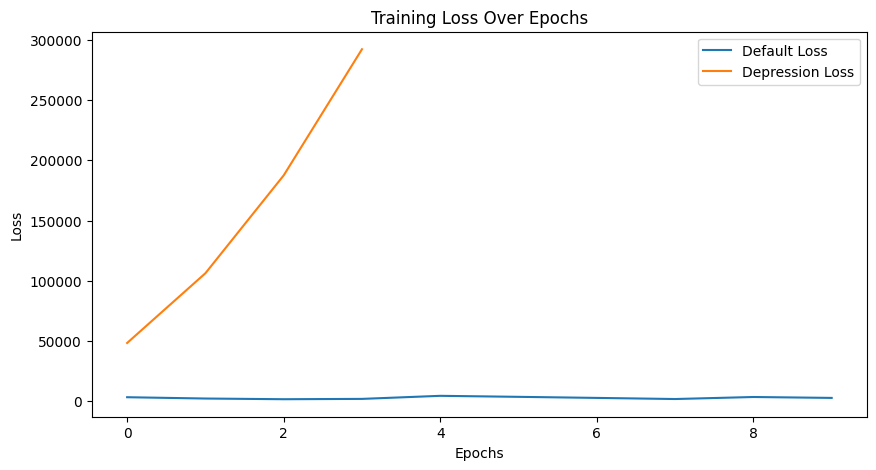

In [4]:
# Load recorded loss data
default_loss_history = np.load("Results/NormalSNN/loss_history.npy") 
depression_loss_history = np.load("Results/DepressionSNN/loss_history.npy")

# print(f"Unique values in Training Loss: {set(default_loss_history)}")
epochs = np.arange(len(default_loss_history))
plt.figure(figsize=(10, 5))
plt.plot(epochs, default_loss_history, label="Default Loss")
plt.plot(epochs, depression_loss_history, label="Depression Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

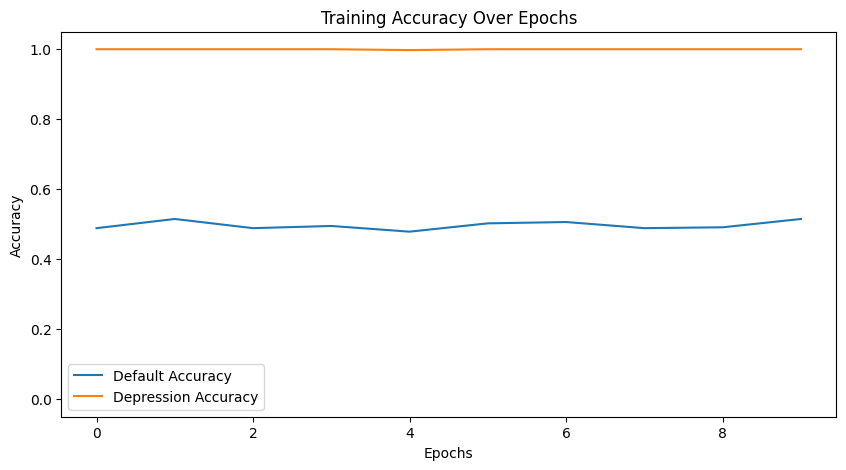

In [5]:
# Load recorded accuracy data
default_accuracy_history = np.load("Results/NormalSNN/accuracy_history.npy") 
depression_accuracy_history = np.load("Results/DepressionSNN/accuracy_history.npy")

# print(f"Unique values in Accuracy: {set(default_accuracy_history)}")
plt.figure(figsize=(10, 5))
plt.plot(epochs, default_accuracy_history, label="Default Accuracy")
plt.plot(epochs, depression_accuracy_history, label="Depression Accuracy")
plt.ylim(-0.05, 1.05)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.show()
